# Introduction to Probabilistic Graphical Models
## Practical Session 2
### Author: Xiang Yu, Email: shawnxiangyu@yahoo.com

In [160]:
%matplotlib inline
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import networkx as nx
import pyparsing
from IPython.display import Math
import copy
import math
from matplotlib.patches import Ellipse 
## we first run the code with the warning enabled, if no error of relevant warning is to be found, 
## we disable the warning then
# import warnings
# warnings.filterwarnings("ignore")

math_pi = math.pi

In [161]:
# choose a large font size by default and use tex for math
fontsize = 18
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'text.usetex': True}
plt.rcParams.update(params)

#### Question 1

We need to compute    
$$
\large \gamma_i(x) = \frac{\pi_i \mathcal{N}(x;\mu_i, \Sigma_i)}{ \sum_{j=1}^K \pi_j \mathcal{N}(x;\mu_j, \Sigma_j)}
$$
We define $g_i(x) = \pi_i \mathcal{N}(x;\mu_i, \Sigma_i)$ and $lg_i = \log g_i(x)$, then the log of the nominator is equal to: 

\begin{align}
\large \log g_i(x) 
& \large = \log \left(\pi_i \mathcal{N}(x;\mu_i, \Sigma_i) \right)\\
& \large = \log \left( \pi_i \frac{1}{(2 \pi)^{K/2} |\Sigma_i|^{1/2}} \exp \left(-\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i)\right)\right)\\
& \large = \log \pi_i - \frac{1}{2} \left( K \log (2 \pi) + \log |\Sigma_i|\right) - \frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1}(x-\mu_i)
\end{align}


Then we could compute $gamma_i(x)$ as follows: 

\begin{align}
\large \gamma_i(x) &=  \large \frac{\pi_i \mathcal{N}(x;\mu_i, \Sigma_i)}{ \sum_{j=1}^K \pi_j \mathcal{N}(x;\mu_j, \Sigma_j)} \\
& \large = \frac {g_i(x)}{\sum_{j=1}^K g_j(x)} = \frac {\exp(\log(g_i(x)))}{\sum_{j=1}^K \exp(\log(g_j(x)))} \\
&  \large =  \frac{\exp(lg_i- maxlg)\exp(maxlg)}{\sum_{j=1}^K \exp(lg_j-maxlg) \exp(maxlg)} \\
&  \large =  \frac{\exp(lg_i-maxlg)}{\sum_{j=1}^K \exp(lg_j-maxlg)}
\end{align}
where $ maxlg = \max_j lg_j =\max_j \log g_j(x), j = 1, ..., K$


### Question 2

From lecture notes, we have: 
$$
\large \mathcal{L}_t(\theta) =  \sum_{n=1}^N \sum_{k=1}^K  \gamma_k^{(t)} (x_n) \log \mathcal{N}(x_n;\mu_k, \Sigma_k) + \sum_{n=1}^N \sum_{k=1}^K  \gamma_k^{(t)} (x_n) \log \pi_k\\
$$

$\mathcal{M}$-step 

\begin{equation*}
\large \theta^{(t+1)} = \arg \max_\theta \mathcal{L}_t(\theta) 
\end{equation*}
where $\theta^{(t)} = (\mu_k^{(t)}, \Sigma_k^{(t)}, \pi_k^{(t)})$


For $\mu_k^{(t+1)}$: 

\begin{align}
\large \frac{\partial \mathcal{L}_t(\theta) }{\partial \mu_k^*}  \propto \sum_{n=1}^N \gamma_k^{(t)} (\Sigma_k)^{-1}(x_n-\mu_k^*) = 0 
& \large \  : \  \sum_{n=1}^N \gamma_k^{(t)}(x_n) (\Sigma_k)^{-1}(x_n-\mu_k^*) = 0  \\
& \large  \sum_{n=1}^N \gamma_k^{(t)}(x_n) (\Sigma_k)^{-1} x_n =  \sum_{n=1}^N \gamma_k^{(t)} (\Sigma_k)^{-1}\mu_k^*  \\
& \large   \mu^*(: = \mu_k^{(t+1)}) = \frac{\sum_{n=1}^N \gamma_k^{(t)}(x_n). x_n}{\sum_{n=1}^N \gamma_k^{(t)}(x_n)}
\end{align}

For $\pi_k^{(t+1)}$

We rewirte the formula for
\begin{align*}
\large \mathcal{L}_t(\theta)  
& \large = \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) \log \left( \pi_k \mathcal{N}(x_n;\mu_k, \Sigma_k) \right)  \\
& \large =  \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) l_k(x_n)  \\
&  \large= \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)} (x_n) \left( \log \pi_k - \frac{1}{2} \left( K \log (2 \pi) + \log |\Sigma_k|\right) - \frac{1}{2}(x-\mu_k)^T \Sigma_k^{-1}(x-\mu_i))\right)
\end{align*}

\begin{align}
\large \frac{\partial \mathcal{L}_t(\theta) }{\partial \pi_k^*} = 0 
& \large \  : \  \sum_{n=1}^N \sum_{k=1}^K \gamma_k^{(t)}(x_n) \frac{1}{\pi_k^*}= 0  \\
\end{align}

Together With $\sum_{k=1}^K \pi_k^*=1$, we get: 
$$ \large \pi_k^* (:\pi_k^{(t+1)}) = \frac{1}{N}\sum_{n=1}^N \gamma_k^{(t)} (x_n) $$

For  $\Sigma_k^{(t+1)}$: 



\begin{align}
\large \frac{\partial \mathcal{L}_t(\theta) }{\partial \Sigma_k^*} = 0  
 \large \ : \  \propto \   \sum_{n=1}^N \gamma_k^{(t)} (x_n) \left( - (\Sigma_k^*) + (x-\mu_k) (x-\mu_k)^T \right) &= 0 \\
 \large\sum_{n=1}^N \gamma_k^{(t)} (x_n) \Sigma_k^* & = \sum_{n=1}^N \gamma_k^{(t)} (x_n) \left((x-\mu_k) (x-\mu_k)^T \right)\\
\large  \Sigma_k^* (: = \Sigma_k^{t+1}) & = \frac{\sum_{n=1}^N \gamma_k^{(t) } (x_n)(x-\mu_k) (x-\mu_k)^T}{\sum_{n=1}^N \gamma_k^{(t)} (x_n)} 
\end{align}

### Question 3

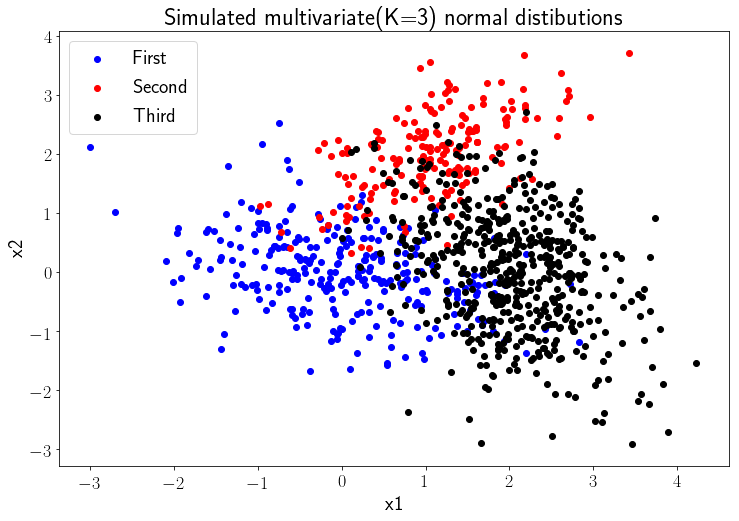

In [162]:
# hyper-parameters

K = 3
colors = ['b', 'r', 'k']
pi = np.array([0.3, 0.2, 0.5])
us = np.array([[0, 0], [1, 2], [2,0]])

# sg1 = np.array([[1, -0.25], [-0.25, 0.5]])
# sg2 = np.array([[0.5, 0.25],[0.25, 0.5]])
# sg3 = np.array([[0.5, -0.25],[-0.25, 1]])
# sigmas = [sg1, sg2, sg3]
sgs = np.array([[[1, -0.25], [-0.25, 0.5]], [[0.5, 0.25],[0.25, 0.5]], [[0.5, -0.25],[-0.25, 1]]])

def sample_loc (prob, pi_distrbution):    
    # return the idx loction of prob in the prob_distrbution
    nr_loc = len(pi_distrbution)
    cum_sum = np.cumsum(pi_distrbution)  
    idx = np.where(prob < cum_sum)[0]  
    return idx[0]


N = 1000  # number of samples

xs = np.zeros((N, 3))
# simulator the trajectory 
for i in np.arange(0,N):   
    
    si_pi = np.random.uniform(0,1)
    gs_id = sample_loc(si_pi, pi)   
    ui = us[gs_id]
    sgi = sgs[gs_id]   
    xs[i,[0,1]] = np.random.multivariate_normal(ui, sgi)
    xs[i,2] = gs_id


x_g1 = xs[xs[:,2] == 0][:,[0,1]]
x_g2 = xs[xs[:,2] == 1][:,[0,1]]
x_g3 = xs[xs[:,2] == 2][:,[0,1]]

plt.figure(figsize=(12, 8))
plt.scatter(x_g1[:,0], x_g1[:,1], c=colors[0], label='First') 
plt.scatter(x_g2[:,0], x_g2[:,1], c=colors[1], label='Second')
plt.scatter(x_g3[:,0], x_g3[:,1], c=colors[2], label='Third') 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Simulated multivariate(K=3) normal distibutions ')
plt.show() 



In [163]:
def cal_loggi(pi, ui, sigi, x, nr_x):
    
    sigi_inv = np.linalg.inv(sigi)
    log2pi = np.log(2* math_pi)
    log_sigi_det = np.log(np.linalg.det(sigi))
    
    diff = x - ui
    exp_part = [- diff[j,:].dot(sigi_inv).dot(diff[j,:]) / 2 for j in np.arange(nr_x)]
    loggi = np.log(pi) - (K * log2pi + log_sigi_det) / 2 + exp_part
    
    return loggi
    
    
    
def cal_gammas(K, ps, us, sigs, xs):
    gamma_KNs = np.zeros((K,N))
    
    nr_x = N
    logg_KN = np.zeros((K, N))
    for j in np.arange(K):
        logg_KN[j,:] = cal_loggi(ps[j], us[j], sigs[j], xs, nr_x)
        
    max_lgs = np.max(logg_KN, axis=0)      
    lg_diff = logg_KN - max_lgs
    sum_exp = np.sum(np.exp(lg_diff), axis=0)

    for j in np.arange(K):                
        gamma_KNs[j,:] = np.divide(np.exp(logg_KN[j,:] - max_lgs), sum_exp)
    
    return gamma_KNs
    


In [164]:
def update_para(gammas, K, ps, us, sigs, xs):
    
    ps_new = ps.copy()
    us_new = us.copy()
    sigs_new = sigs.copy()
    
    for j in np.arange(K): 
        
        sum_gamma = np.sum(gammas[j,:])
        us_new[j,:] = np.sum(xs.T * gammas[j,:], axis=1) / sum_gamma      
        ps_new[j] = sum_gamma / N    
        diff = xs - us_new[j,:]   
        sig_nom = [gammas[j,i] * np.outer(diff[i,:], diff[i,:]) for i in np.arange(N)]  
        sigs_new[j,:] = np.sum(sig_nom, axis=0) / sum_gamma
                   
    return us_new, ps_new, sigs_new


In [165]:
def cal_loglik(K, ps, us, sigs, xs, gammas): 
    
    loglik = 0
    for k in range(K):
        
        sigi = sigs[k]
        
        sigi_inv = np.linalg.inv(sigi)
        log2pi = np.log(2* math_pi)
        log_sigi_det = np.log(np.linalg.det(sigi))
        ui = us[k]
        pi = ps[k]
        diff = xs - ui 
        
        
        exp_part = [- diff[j,:].dot(sigi_inv).dot(diff[j,:]) / 2 for j in np.arange(N)]
        log_part = - (K * log2pi + log_sigi_det) / 2 + exp_part  + np.log(pi)
        
        loglik += np.sum(gammas[k,:] * (log_part + exp_part))

    return loglik
    

In [166]:
def plot_contour(ax, us, sigs, lcolors):
    '''
    This function plot on the axe ax ellipses (mu, sigma): reference to Henri Hours code for this plot
    '''
    for k in range(K):
        v, w = np.linalg.eigh(sigs[k])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 8
        ellipse = Ellipse(us[k], v[0], v[1], 180 + angle, lw=2, ec=lcolors[k], fc='none')
        ellipse.set_clip_box(ax.bbox)
        ellipse.set_alpha(0.5)
        
        ax.add_artist(ellipse)
    
        

In [167]:

xs_nl = xs[:,:2]  # not labeled data
xs_mean = np.mean(xs_nl, axis=0)
xs_cov = np.cov(xs_nl.T)



# initilize the parameters: set them to be equal
xs = xs_nl.copy()
ps = np.ones((3,1)) / K

us = np.array([[0, 0.5], [1, 1.2], [2,0.1]])
#us = np.array([xs_mean, xs_mean, xs_mean])
sigs = np.array([xs_cov, xs_cov, xs_cov])

gammas = cal_gammas(K, ps, us, sigs, xs)
    
log_lik = cal_loglik(K, ps, us, sigs, xs, gammas)

print (log_lik)

-5804.6052496393695


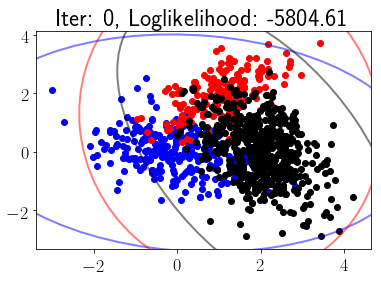

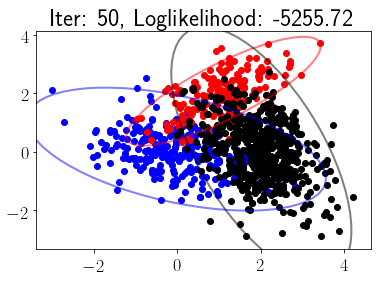

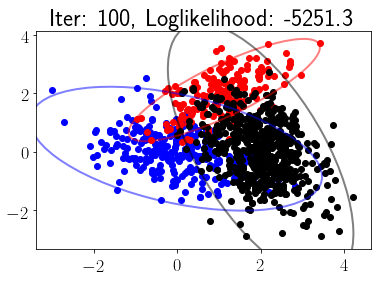

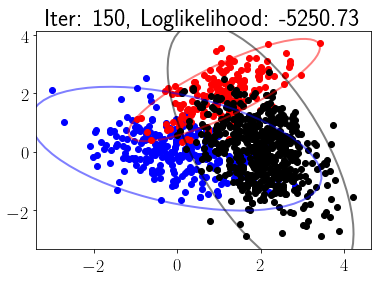

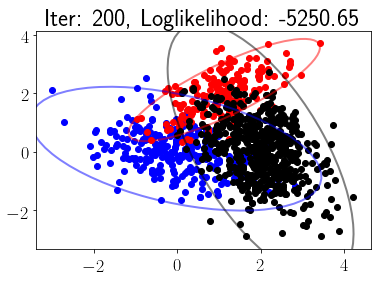

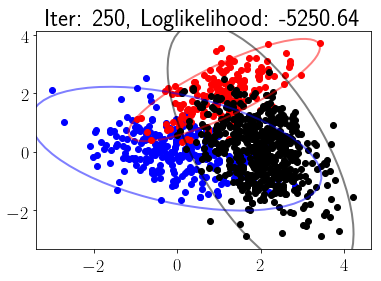

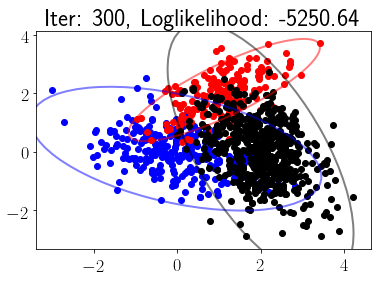

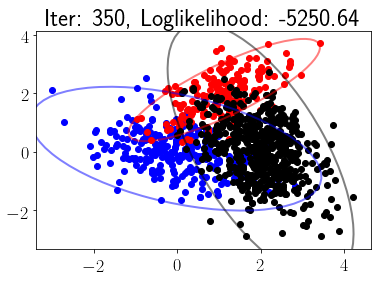

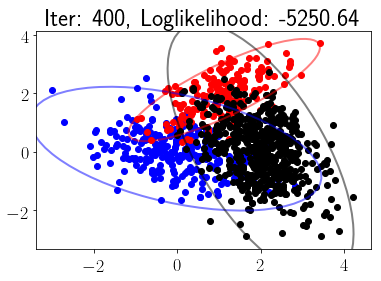

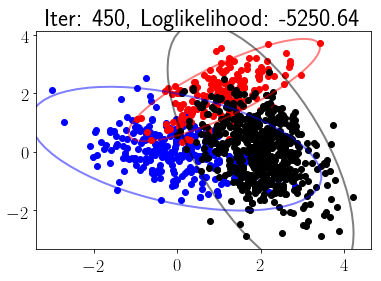

In [168]:
#### 2. Implement the EM algorithm for GMMs

xs_nl = xs[:,:2]  # not labeled data
xs_mean = np.mean(xs_nl, axis=0)
xs_cov = np.cov(xs_nl.T)

# initilize the parameters: set them to be equal
xs = xs_nl.copy()
ps = np.ones((3,1)) / K

us = np.array([[0, 0.5], [1, 1.2], [2,0.1]]) # random choose some centers
sigs = np.array([xs_cov, xs_cov, xs_cov])



Nr_iter = 500
log_liks = np.zeros((Nr_iter, 1))

for it in np.arange(Nr_iter): 
    
    gammas = cal_gammas(K, ps, us, sigs, xs)
    
    log_lik = cal_loglik(K, ps, us, sigs, xs, gammas)
    us_new, ps_new, sigs_new = update_para(gammas, K, ps, us, sigs, xs)
    
    log_liks[it] = log_lik
    
    title_str = "Nr_Iter: " + str(it) + ", Loglikelihood: " + str(round(log_lik, 2))
    
    if it % 50 == 0: 
        #fig, ax = plt.subplots(figsize=(8,8))
        fig, ax = plt.subplots()
        plt.scatter(x_g1[:,0], x_g1[:,1], c='b', label='First') 
        plt.scatter(x_g2[:,0], x_g2[:,1], c='r', label='Second')
        plt.scatter(x_g3[:,0], x_g3[:,1], c='k', label='Third') 
         
        plot_contour(ax, us_new, sigs_new, colors)

        ax.set_title("Iter: " + str(it) + ", Loglikelihood: " + str(np.round(log_lik, 2)))
        plt.show()    
        
   
    us = us_new.copy()
    ps =  ps_new.copy()
    sigs= sigs_new.copy()
        

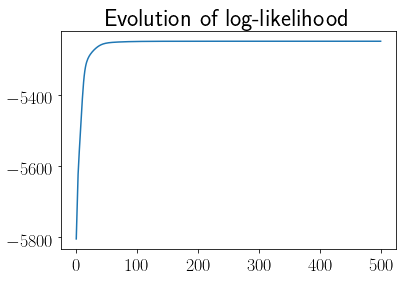

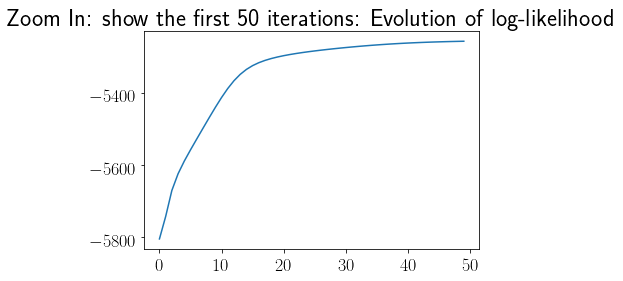

In [169]:
# Evolution of log-likelihood
plt.plot(np.arange(Nr_iter), log_liks)
plt.title("Evolution of log-likelihood")
plt.show()

plt.plot(np.arange(50), log_liks[:50])
plt.title("Zoom In: show the first 50 iterations: Evolution of log-likelihood")
plt.show()

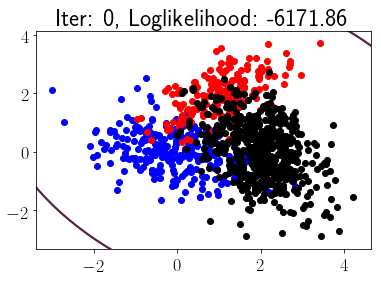

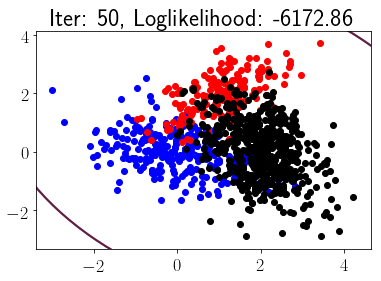

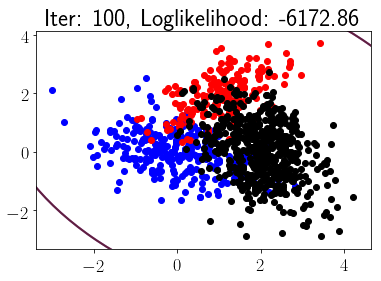

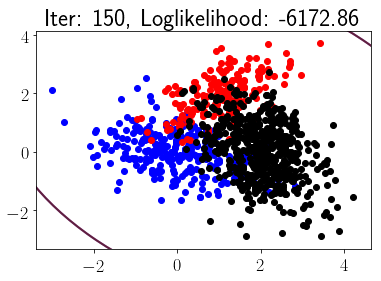

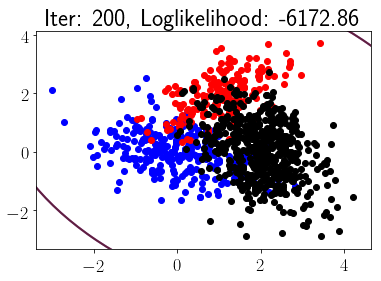

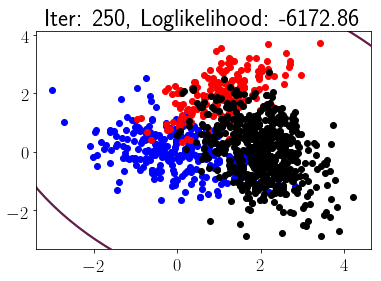

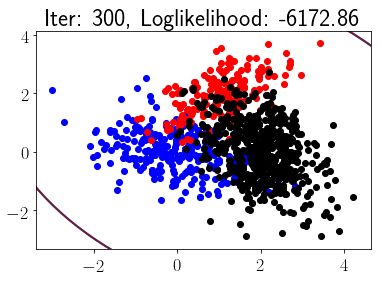

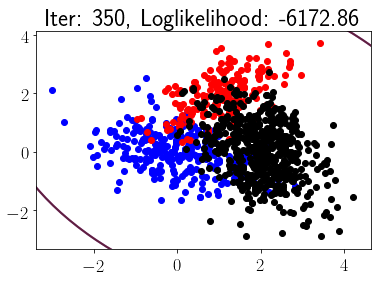

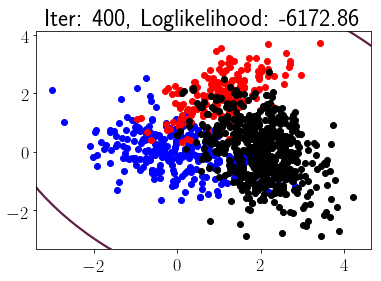

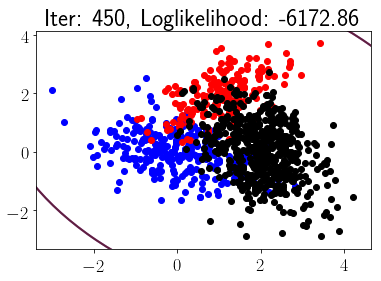

In [170]:
### Test with different initial values: 

xs_nl = xs[:,:2]  # not labeled data
xs_mean = np.mean(xs_nl, axis=0)
xs_cov = np.cov(xs_nl.T)

# initilize the parameters with the same values
ps = np.ones((3,1)) / K
us = np.array([xs_mean, xs_mean, xs_mean])
sigs = np.array([xs_cov, xs_cov, xs_cov])

Nr_iter = 500
log_liks = np.zeros((Nr_iter, 1))

for it in np.arange(Nr_iter): 
    
    gammas = cal_gammas(K, ps, us, sigs, xs)
    
    log_lik = cal_loglik(K, ps, us, sigs, xs, gammas)
    us_new, ps_new, sigs_new = update_para(gammas, K, ps, us, sigs, xs)
    
    log_liks[it] = log_lik
    
    title_str = "Nr_Iter: " + str(it) + ", Loglikelihood: " + str(round(log_lik, 2))
    
    if it % 50 == 0: 
        #fig, ax = plt.subplots(figsize=(8,8))
        fig, ax = plt.subplots()
        plt.scatter(x_g1[:,0], x_g1[:,1], c='b', label='First') 
        plt.scatter(x_g2[:,0], x_g2[:,1], c='r', label='Second')
        plt.scatter(x_g3[:,0], x_g3[:,1], c='k', label='Third') 
         
        plot_contour(ax, us_new, sigs_new, colors)

        ax.set_title("Iter: " + str(it) + ", Loglikelihood: " + str(np.round(log_lik, 2)))
        plt.show()    
          
    us = us_new.copy()
    ps =  ps_new.copy()
    sigs= sigs_new.copy()
        

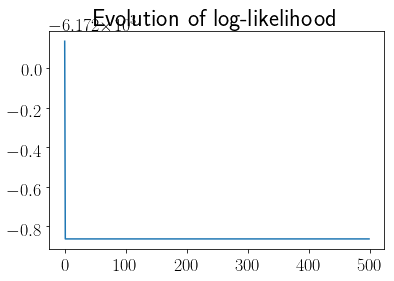

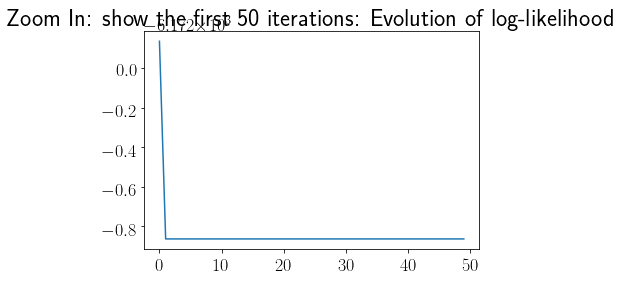

In [171]:
# Evolution of log-likelihood
plt.plot(np.arange(Nr_iter), log_liks)
plt.title("Evolution of log-likelihood")
plt.show()

plt.plot(np.arange(50), log_liks[:50])
plt.title("Zoom In: show the first 50 iterations: Evolution of log-likelihood")
plt.show()

Conclunsion: the model is very sensitive to the inital data